In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from lightgbm import LGBMClassifier
import lightgbm as lgb


smoke_df = pd.read_csv('/content/drive/MyDrive/랭체인 AI 영상객체탐지분석 플랫폼 구축/data/smoking_driking_dataset_Ver01.csv', encoding='CP949')
smoke_df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


# info로 데이터셋 확인

In [ ]:
smoke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

# .describe() 로 이상치 확인

In [ ]:
smoke_df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


# DRK_YN이 문자열이라 분류 타깃을 0 / 1로 변환

In [ ]:
y = smoke_df["DRK_YN"].map({"N": 0, "Y": 1}).astype(int)

# DRK_YN은 이미 Y로 산출했으니 입력되는 X에서는 제거

In [ ]:
X = smoke_df.drop(columns=["DRK_YN"])

# 성별도 Male / Female 이라 타깃을 0 / 1 로 변환

In [ ]:
X["sex"] = X["sex"].map({"Male": 1, "Female": 0}).astype(int)

# SMK_stat_type_cd 가 숫자처럼 보이지만 문자열일수 있기때문에 정수형으로 강제 변환

In [ ]:
X["SMK_stat_type_cd"] = X["SMK_stat_type_cd"].astype(int)

# 각 숫자 컬럼별 극단적인 저점 / 고점 기준선 설정

In [ ]:
num_cols = X.select_dtypes(include=[np.number]).columns
low = X[num_cols].quantile(0.001)   # 0.1%
high = X[num_cols].quantile(0.999)  # 99.9%
X[num_cols] = X[num_cols].clip(low, high, axis=1)

# triglyceride (중성지방) 이상치 시각화 자료로 확인

<Axes: ylabel='triglyceride'>

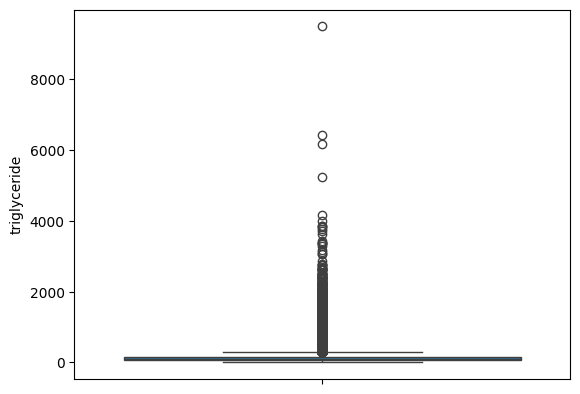

In [ ]:
sns.boxplot(smoke_df['triglyceride'])

# 이상치 경계 설정

In [ ]:
Q1 = smoke_df['triglyceride'].quantile(0.25)
Q3 = smoke_df['triglyceride'].quantile(0.75)


In [ ]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

-56.0 288.0


In [ ]:
smoke_df = smoke_df[(smoke_df['triglyceride'] >= lower_bound) & (smoke_df['triglyceride'] <= upper_bound)]
len(smoke_df)

937242

<Axes: ylabel='triglyceride'>

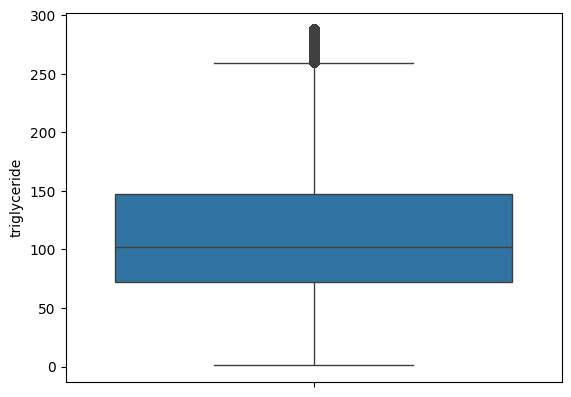

In [ ]:
sns.boxplot(smoke_df['triglyceride'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  int64  
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

# 범주형 컬럼을 전부 원핫 인코딩

In [ ]:
smoke_df = pd.get_dummies(smoke_df, columns=smoke_df.select_dtypes(exclude=['number']).columns.tolist(), drop_first=True)
smoke_df.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,sex_Male,DRK_YN_Y
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,True,True
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,True,False
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,True,False
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,True,False
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,True,False


# 타깃과 상관관계 높은 변수를 확인

In [ ]:
correlation_matrix = smoke_df.corr()
target_corr = correlation_matrix['DRK_YN_Y'].sort_values(ascending=False)
print(target_corr)

DRK_YN_Y            1.000000
height              0.368738
sex_Male            0.358390
SMK_stat_type_cd    0.340675
hemoglobin          0.290476
weight              0.254581
gamma_GTP           0.192260
DBP                 0.089560
waistline           0.083857
sight_left          0.076134
sight_right         0.073601
triglyceride        0.068646
HDL_chole           0.065381
serum_creatinine    0.059253
SGOT_ALT            0.051673
SGOT_AST            0.030753
SBP                 0.022575
tot_chole           0.006719
BLDS                0.003474
urine_protein      -0.005194
LDL_chole          -0.040690
hear_right         -0.057640
hear_left          -0.057794
age                -0.284031
Name: DRK_YN_Y, dtype: float64


In [ ]:
smoke_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937242 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               937242 non-null  int64  
 1   height            937242 non-null  int64  
 2   weight            937242 non-null  int64  
 3   waistline         937242 non-null  float64
 4   sight_left        937242 non-null  float64
 5   sight_right       937242 non-null  float64
 6   hear_left         937242 non-null  float64
 7   hear_right        937242 non-null  float64
 8   SBP               937242 non-null  float64
 9   DBP               937242 non-null  float64
 10  BLDS              937242 non-null  float64
 11  tot_chole         937242 non-null  float64
 12  HDL_chole         937242 non-null  float64
 13  LDL_chole         937242 non-null  float64
 14  triglyceride      937242 non-null  float64
 15  hemoglobin        937242 non-null  float64
 16  urine_protein     937242 

# 상관관계 히트맵으로 전체 구조를 시각화

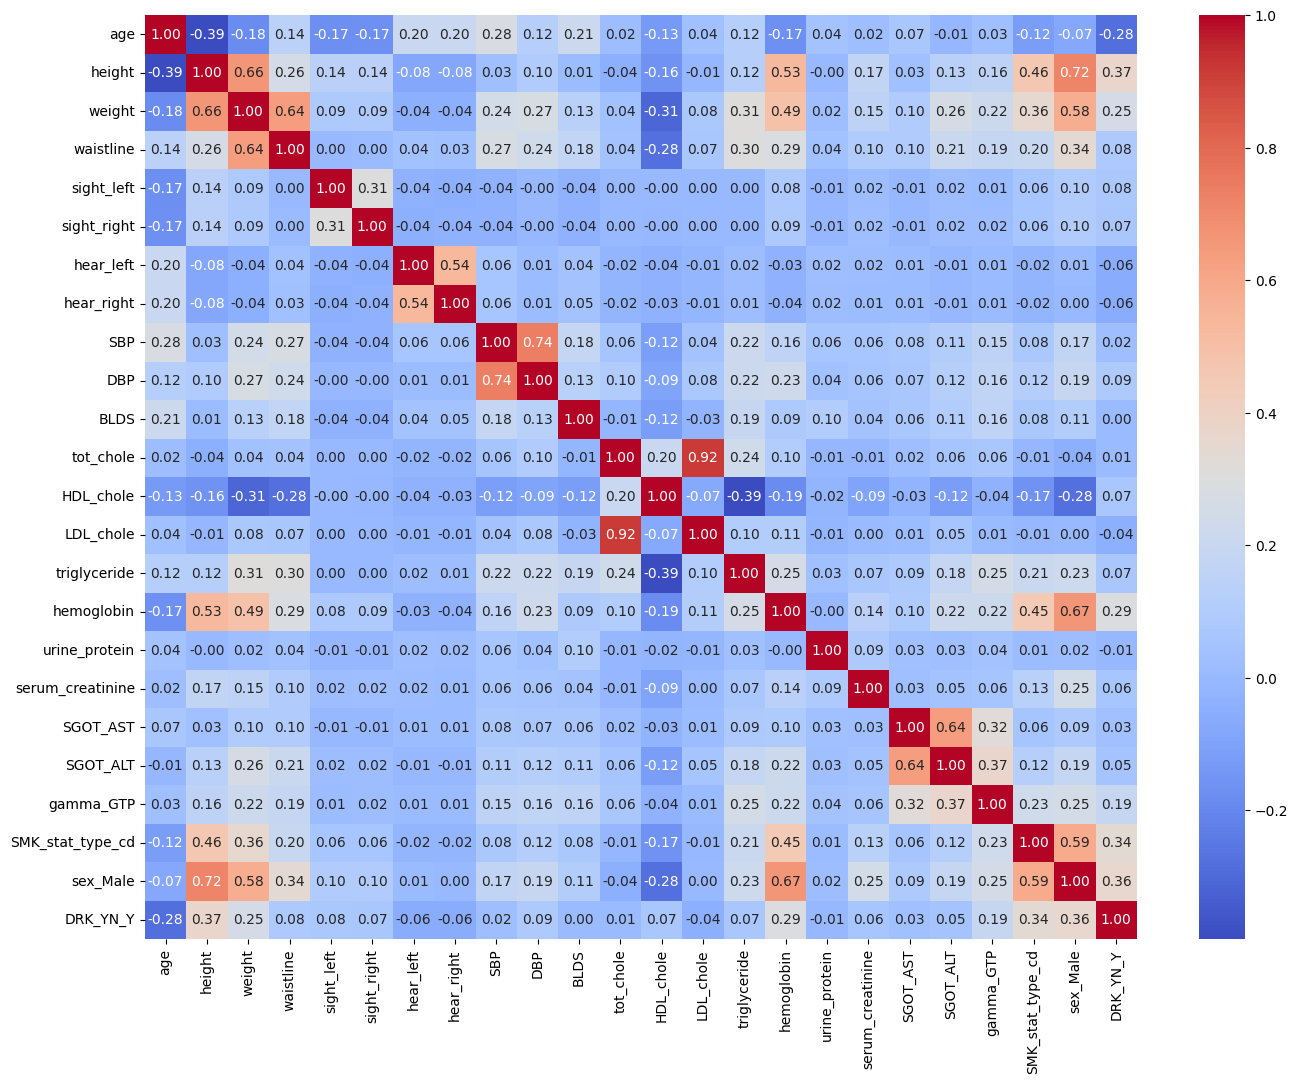

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# 총합 콜레스테롤과 LDL콜레스테롤중 중복 정보가 큰 tot_chole 제거

In [ ]:
sm1 = smoke_df.drop(columns=["tot_chole"])

In [ ]:
sm1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937242 entries, 0 to 991345
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               937242 non-null  int64  
 1   height            937242 non-null  int64  
 2   weight            937242 non-null  int64  
 3   waistline         937242 non-null  float64
 4   sight_left        937242 non-null  float64
 5   sight_right       937242 non-null  float64
 6   hear_left         937242 non-null  float64
 7   hear_right        937242 non-null  float64
 8   SBP               937242 non-null  float64
 9   DBP               937242 non-null  float64
 10  BLDS              937242 non-null  float64
 11  HDL_chole         937242 non-null  float64
 12  LDL_chole         937242 non-null  float64
 13  triglyceride      937242 non-null  float64
 14  hemoglobin        937242 non-null  float64
 15  urine_protein     937242 non-null  float64
 16  serum_creatinine  937242 

# 에러 처리를 위한 bool -> int 형변환 ( 0 / 1 )

In [ ]:
bool_cols = sm1.select_dtypes(include=["bool"]).columns
sm1[bool_cols] = sm1[bool_cols].astype(int)

In [ ]:
sm1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937242 entries, 0 to 991345
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               937242 non-null  int64  
 1   height            937242 non-null  int64  
 2   weight            937242 non-null  int64  
 3   waistline         937242 non-null  float64
 4   sight_left        937242 non-null  float64
 5   sight_right       937242 non-null  float64
 6   hear_left         937242 non-null  float64
 7   hear_right        937242 non-null  float64
 8   SBP               937242 non-null  float64
 9   DBP               937242 non-null  float64
 10  BLDS              937242 non-null  float64
 11  HDL_chole         937242 non-null  float64
 12  LDL_chole         937242 non-null  float64
 13  triglyceride      937242 non-null  float64
 14  hemoglobin        937242 non-null  float64
 15  urine_protein     937242 non-null  float64
 16  serum_creatinine  937242 

In [ ]:
target = "DRK_YN_Y"
X = sm1.drop(columns=[target]).copy()
y = sm1[target].astype(int)


# train(학습)/valid(검증)/test(평가용) 나누기

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("train:", X_train.shape, y_train.shape)
print("valid:", X_valid.shape, y_valid.shape)
print("test :", X_test.shape,  y_test.shape)


train: (656069, 22) (656069,)
valid: (140586, 22) (140586,)
test : (140587, 22) (140587,)


In [ ]:
print("sm1 columns:", len(sm1.columns))
print("X_train columns:", X_train.shape[1])
print("target in X_train?", "DRK_YN_Y" in X_train.columns)


sm1 columns: 23
X_train columns: 22
target in X_train? False


# 모델 학습 / 성능 평가

In [ ]:
# =========================
# 모델 학습 (AUC 기준 + Early Stopping)
# =========================
model = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=5000,        # 크게 잡고 early stopping으로 끊음
    learning_rate=0.03,
    num_leaves=63,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1,
)

model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="auc",
    callbacks=[
        lgb.early_stopping(stopping_rounds=200, first_metric_only=True, verbose=True),
        lgb.log_evaluation(period=50)
    ]
)

print("best_iteration_:", model.best_iteration_)

# =========================
# 성능 평가 (Valid/Test AUC)
# =========================
valid_proba = model.predict_proba(X_valid, num_iteration=model.best_iteration_)[:, 1]
test_proba  = model.predict_proba(X_test,  num_iteration=model.best_iteration_)[:, 1]

valid_auc = roc_auc_score(y_valid, valid_proba)
test_auc  = roc_auc_score(y_test,  test_proba)

print(f"Valid AUC: {valid_auc:.4f}")
print(f"Test  AUC: {test_auc:.4f}")

# (선택) 0.5 임계값 기준 accuracy/리포트
test_pred = (test_proba >= 0.5).astype(int)
print("Test ACC:", accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

# =========================
# Feature Importance 출력 (gain 기준 추천)
# =========================
importance = pd.DataFrame({
    "feature": X.columns,
    "importance_gain": model.booster_.feature_importance(importance_type="gain"),
    "importance_split": model.booster_.feature_importance(importance_type="split"),
}).sort_values("importance_gain", ascending=False)

print("\n[Top 30 Feature Importances (gain)]")
print(importance.head(30).to_string(index=False))

# (선택) CSV로 저장
# importance.to_csv("lgbm_feature_importance.csv", index=False)

[LightGBM] [Info] Number of positive: 321219, number of negative: 334850
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.244475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2490
[LightGBM] [Info] Number of data points in the train set: 656069, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489612 -> initscore=-0.041560
[LightGBM] [Info] Start training from score -0.041560
Training until validation scores don't improve for 1000 rounds
[50]	valid_0's auc: 0.80715	valid_0's binary_logloss: 0.55094
[100]	valid_0's auc: 0.811142	valid_0's binary_logloss: 0.531013
[150]	valid_0's auc: 0.813995	valid_0's binary_logloss: 0.525139
[200]	valid_0's auc: 0.815533	valid_0's binary_logloss: 0.522513
[250]	valid_0's auc: 0.816391	valid_0's binary_logloss: 0.52116
[300]	valid_0's auc: 0.816924	valid_0's binary_logloss: 0.520353
[350]	valid_0's auc: 0.817215	valid_0's binary_logloss

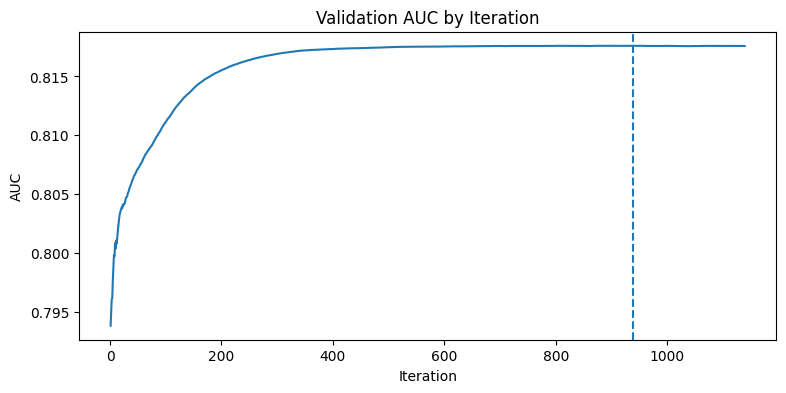

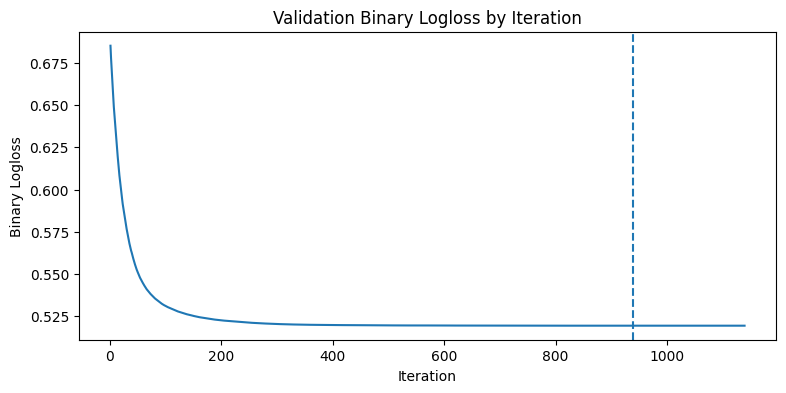

In [ ]:

res = model.evals_result_

auc_list = res["valid_0"]["auc"]
logloss_list = res["valid_0"]["binary_logloss"]
iters = range(1, len(auc_list) + 1)

plt.figure(figsize=(9,4))
plt.plot(iters, auc_list)
plt.axvline(model.best_iteration_, linestyle="--")
plt.title("Validation AUC by Iteration")
plt.xlabel("Iteration")
plt.ylabel("AUC")
plt.show()

plt.figure(figsize=(9,4))
plt.plot(iters, logloss_list)
plt.axvline(model.best_iteration_, linestyle="--")
plt.title("Validation Binary Logloss by Iteration")
plt.xlabel("Iteration")
plt.ylabel("Binary Logloss")
plt.show()